Réalisé par:


*  Karim Ellouze
*   Selma Guedidi
*  Ahmed Aziz Boussaid


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
# from keras.layers.core import Activation, Dropout, Dense
from tensorflow.keras.layers import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D
from keras.layers import LSTM
# from keras.layers.embeddings import Embedding
from tensorflow.keras.layers import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, GRU



In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


# Dataset:

In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/IMDB Dataset.csv")

In [ ]:
print("Dataset Dimensions : ", dataset.shape)

Dataset Dimensions :  (50000, 2)


In [ ]:
dataset.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
dataset.iloc[3]['review']

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

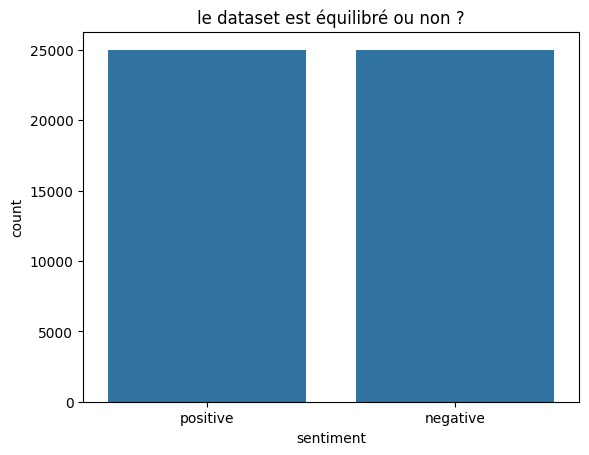

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=dataset)
plt.title("le dataset est équilibré ou non ?")
plt.show()

# Data preprocessing

In [ ]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    return sentence
TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(text):
    return TAG_RE.sub('', text)

In [ ]:
X = []
sentences = list(dataset['review'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [ ]:
X[3]

'Basically there a family where little boy Jake thinks there a zombie in his closet his parents are fighting all the time This movie is slower than soap opera and suddenly Jake decides to become Rambo and kill the zombie OK first of all when you re going to make film you must Decide if its thriller or drama As drama the movie is watchable Parents are divorcing arguing like in real life And then we have Jake with his closet which totally ruins all the film expected to see BOOGEYMAN similar movie and instead watched drama with some meaningless thriller spots out of just for the well playing parents descent dialogs As for the shots with Jake just ignore them '

Le prétraitement aide à diminuer le bruit dans le texte et garantit que les analyses soient effectuées de manière efficace.

In [ ]:
y = dataset['sentiment']
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=42)

In [ ]:
# Afficher le nombre d'éléments dans chaque liste
print("Nombre d'éléments dans l'ensemble d'apprentissage (X_train) :", len(X_train))
print("Nombre d'éléments dans l'ensemble de test (X_test) :", len(X_test))
print("Nombre d'éléments dans la sortie de l'ensemble d'apprentissage (y_train) :", len(y_train))
print("Nombre d'éléments dans la sortie de l'ensemble de test (y_test) :", len(y_test))


Nombre d'éléments dans l'ensemble d'apprentissage (X_train) : 40000
Nombre d'éléments dans l'ensemble de test (X_test) : 10000
Nombre d'éléments dans la sortie de l'ensemble d'apprentissage (y_train) : 40000
Nombre d'éléments dans la sortie de l'ensemble de test (y_test) : 10000


In [ ]:
X_train[5]

'I don know how this movie received so many positive reviews on this site m big vonnegut fan and am very familiar with the story this Showtime original film bastardized beyond belief but even if wasn the poor acting VERY poor casting Sean Astin as the brilliant athletic and all around individual Harrison The guy completely generic and sub standard writing rendered this tripe barely watchable Someone pointed out how cute that Maculay Culkin line was If you read that and thought that was pure comic brilliance sadly it probably was the most INTENTIONALLY funny part of the movie maybe you ll like this movie But if you re Vonnegut fan or not completely insane don see it Please '

# Embedding layer

In [ ]:
# num_words: specifies the maximum number of words to keep, based on word frequency.
# In other words, when tokenizing text data, only the num_words most frequent words will be kept in the vocabulary,
#  and all other words will be discarded.

# num_words=5000, the tokenizer will keep the 5000 most frequent words in the text data and discard all other words.
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

X_train contient 40000 listes correspondant aux phrases où chacune contient des entiers.

La taille de chaque liste est différente car les phrases possèdent des tailles différentes.


In [ ]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
#  Cette ligne utilise la fonction pad_sequences pour rembourrer (ou tronquer)
#  les séquences de mots dans X_train jusqu'à ce qu'elles atteignent la longueur maxlen.
#  Le paramètre padding='post' indique que le rembourrage doit être ajouté à la fin de chaque séquence de mots.
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
X_train[5]

array([1125,  804,   18,    8, 2012,  147,  189,  320,    2,  228,   48,
       1052,   14,    1,   58,    8,  205,   16,  649, 2560,   15,   55,
         41,  288,    1,  329,  110,   48,  329, 1029, 1813,   11,    1,
        504,    2,   26,  182, 2013,    1,  206,  332, 3847,    2, 1335,
       1222,  477,    8, 4357, 1149, 1681,  280, 3338,   39,   80, 1002,
          9,  344,   10,   41,   17,  333,    9,    2,  187,    9,   10,
       1033,  739, 3532, 1030,    6,  233,   10,    1,   85, 4964,  155,
        172,    3,    1,   12,  267,   17,  227,   34,    8,   12,   15,
         41,   17,  148,  320,   36,   19,  332, 2018,   82,   61,    6,
        581], dtype=int32)

In [ ]:
# vocabulary_size contient maintenant une valeur 92547 signifie que: le corpus contient 92547 mots uniques.
print(vocab_size)

92547


In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

# Ces vecteurs d'embedding sont des représentations vectorielles de dimension fixe qui capturent les informations sémantiques
# et contextuelles des mots dans un espace vectoriel continu.
embeddings_dictionary = dict()
glove_file = open("/content/glove.6B.100d.txt", encoding="utf8")
for line in glove_file:
  # split chaque ligne
  records = line.split()
  # Extraire le mot
  word = records[0]
  # Extraire leur liste d’embeddings correspondante en tant que valeurs.
  vector_dimensions = asarray(records[1:],dtype='float32')
  # les ajouter au dictionnaire
  embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
embedding_matrix_glove = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
  embedding_vector = embeddings_dictionary.get(word)
  if embedding_vector is not None:
    embedding_matrix_glove[index] = embedding_vector

In [ ]:
print(embedding_matrix_glove.shape)

(92547, 100)


# Classification using a simple neural network

In [ ]:
def SimpleNeuralNetwork(embedding_matrix):
  model = Sequential()
# Ajout de la couche Embedding
  model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False))
# Ajout de la couche Flatten
  model.add(Flatten())
# Ajout de la couche Dense
  model.add(Dense(units=1, activation='sigmoid'))
# Compilation du modèle
  model.compile(loss=binary_crossentropy, optimizer=Adam(), metrics=['acc'])
  return model

In [ ]:
def evaluate(X_test, y_test,model):
  score = model.evaluate(X_test, y_test, verbose=1)
  print("Test Score:", score[0])
  print("Test Accuracy:", score[1])


In [ ]:
def plot(history):
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train','test'], loc='upper left')
  plt.show()
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train','test'], loc='upper left')
  plt.show()



Epoch 1/6
250/250 [==============================] - 3s 8ms/step - loss: 0.6044 - acc: 0.6702 - val_loss: 0.6045 - val_acc: 0.6773
Epoch 2/6
250/250 [==============================] - 2s 8ms/step - loss: 0.5033 - acc: 0.7552 - val_loss: 0.5343 - val_acc: 0.7319
Epoch 3/6
250/250 [==============================] - 1s 6ms/step - loss: 0.4599 - acc: 0.7865 - val_loss: 0.5211 - val_acc: 0.7449
Epoch 4/6
250/250 [==============================] - 1s 4ms/step - loss: 0.4383 - acc: 0.7987 - val_loss: 0.5243 - val_acc: 0.7435
Epoch 5/6
250/250 [==============================] - 1s 4ms/step - loss: 0.4214 - acc: 0.8066 - val_loss: 0.5239 - val_acc: 0.7465
Epoch 6/6
313/313 [==============================] - 1s 2ms/step - loss: 0.5339 - acc: 0.7419
Test Score: 0.5339395999908447
Test Accuracy: 0.7419000267982483


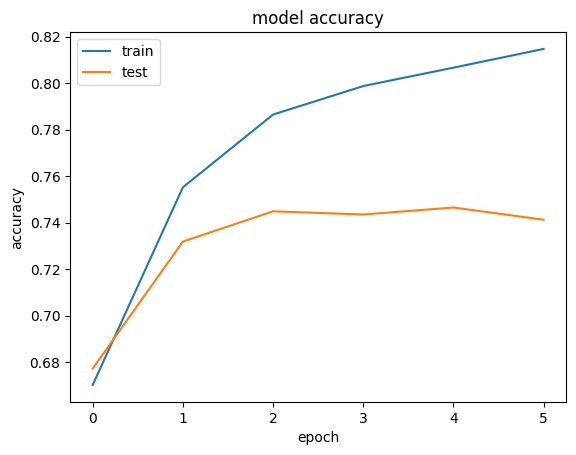

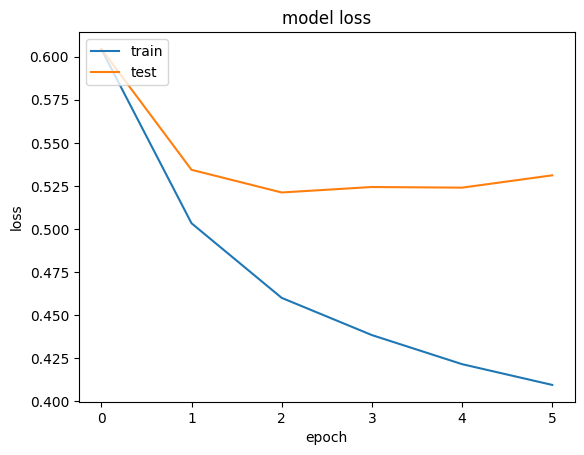

In [ ]:
# Entraînement du modèle
model_SNN = SimpleNeuralNetwork(embedding_matrix_glove)
history_SNN = model_SNN.fit(X_train, y_train, epochs=6, batch_size=128, verbose=1, validation_split=0.2)

evaluate(X_test, y_test,model_SNN)
plot(history_SNN)

On remarque que: accuracy avec ce modèle est faible (c'est vrai quelle augmente mais toujours faible elle atteind 0.81 dans le training et 0.7 dans le test )

# Classification using a convolutional neural network (CNN)


In [ ]:
def CnnModel(embedding_matrix):
  # Création du modèle séquentiel
  model = Sequential()

  # Ajout de la couche Embedding
  model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen))

  # Ajout de la couche Convolutional
  model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))

  # Ajout de la couche de Pooling
  model.add(MaxPooling1D())

  # Ajout de la couche Dense
  model.add(Dense(units=1, activation='sigmoid'))

  # Compilation du modèle
  model.compile(loss=binary_crossentropy, optimizer=Adam(), metrics=['acc'])
  return model




Epoch 1/6
250/250 [==============================] - 95s 378ms/step - loss: 0.6551 - acc: 0.6053 - val_loss: 0.6338 - val_acc: 0.6313
Epoch 2/6
250/250 [==============================] - 95s 381ms/step - loss: 0.6290 - acc: 0.6353 - val_loss: 0.6285 - val_acc: 0.6351
Epoch 3/6
250/250 [==============================] - 93s 370ms/step - loss: 0.6204 - acc: 0.6446 - val_loss: 0.6260 - val_acc: 0.6383
Epoch 4/6
250/250 [==============================] - 96s 385ms/step - loss: 0.6159 - acc: 0.6490 - val_loss: 0.6325 - val_acc: 0.6319
Epoch 5/6
250/250 [==============================] - 96s 384ms/step - loss: 0.6119 - acc: 0.6525 - val_loss: 0.6239 - val_acc: 0.6404
Epoch 6/6
313/313 [==============================] - 4s 11ms/step - loss: 0.7977 - acc: 0.5047
Test Score: 0.7976731061935425
Test Accuracy: 0.5047290325164795


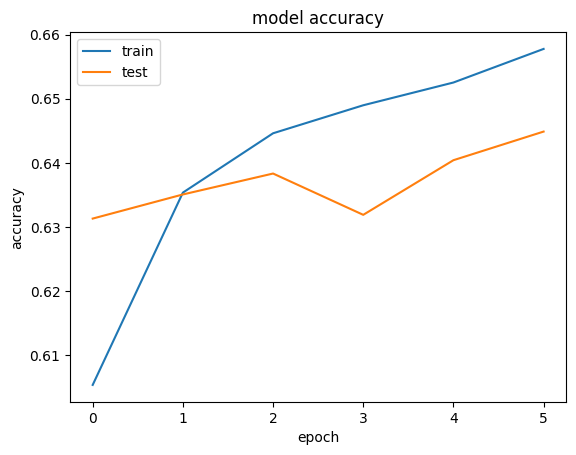

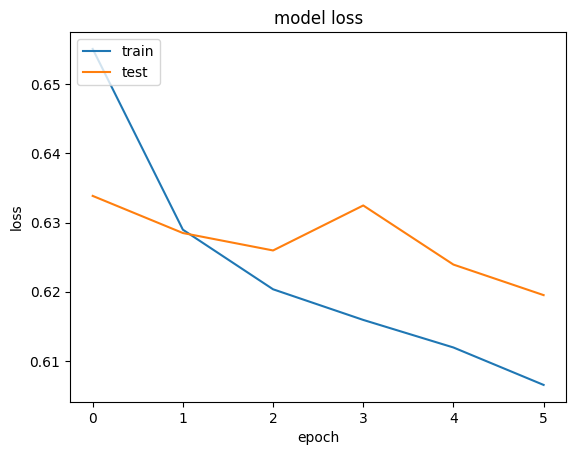

In [ ]:
# Entraînement du modèle
model_cnn = CnnModel(embedding_matrix_glove)
X_train = X_train.reshape(-1, maxlen, 1)
y_train = y_train.reshape(-1, 1)

history_cnn = model_cnn .fit(X_train, y_train, epochs=6, batch_size=128, verbose=1, validation_split=0.2)

evaluate(X_test, y_test,model_cnn)
plot(history_cnn)

# Classification with a recurrent neural network (LSTM)

---



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
def LSTMModel(embedding_matrix,dim=100,vocab_size= vocab_size):
  # Création du modèle séquentiel
  model = Sequential()

  # Ajout de la couche Embedding
  model.add(Embedding(vocab_size, dim, weights=[embedding_matrix], input_length=maxlen))

  # Ajout de la couche LSTM
  model.add(LSTM(units=128))

  # Ajout de la couche Dense
  model.add(Dense(units=1, activation='sigmoid'))

  # Compilation du modèle
  model.compile(loss=binary_crossentropy, optimizer=Adam(), metrics=['acc'])
  return model


In [ ]:
model_lstm = LSTMModel(embedding_matrix_glove)

# Entraînement du modèle
history_lstm = model_lstm.fit(X_train, y_train, epochs=6, batch_size=128, verbose=1, validation_split=0.2)



Epoch 1/6
250/250 [==============================] - 219s 864ms/step - loss: 0.5089 - acc: 0.7462 - val_loss: 0.3769 - val_acc: 0.8331
Epoch 2/6
250/250 [==============================] - 192s 766ms/step - loss: 0.3424 - acc: 0.8537 - val_loss: 0.3847 - val_acc: 0.8226
Epoch 3/6
250/250 [==============================] - 199s 795ms/step - loss: 0.2861 - acc: 0.8826 - val_loss: 0.3246 - val_acc: 0.8634
Epoch 4/6
250/250 [==============================] - 203s 812ms/step - loss: 0.2558 - acc: 0.8987 - val_loss: 0.3208 - val_acc: 0.8670
Epoch 5/6
250/250 [==============================] - 190s 761ms/step - loss: 0.2347 - acc: 0.9085 - val_loss: 0.3351 - val_acc: 0.8669
Epoch 6/6
250/250 [==============================] - 188s 750ms/step - loss: 0.2108 - acc: 0.9199 - val_loss: 0.3549 - val_acc: 0.8644


313/313 [==============================] - 20s 65ms/step - loss: 0.3401 - acc: 0.8711
Test Score: 0.34008949995040894
Test Accuracy: 0.8711000084877014


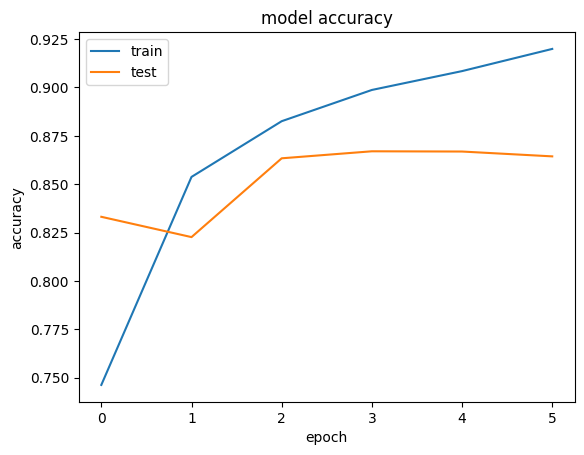

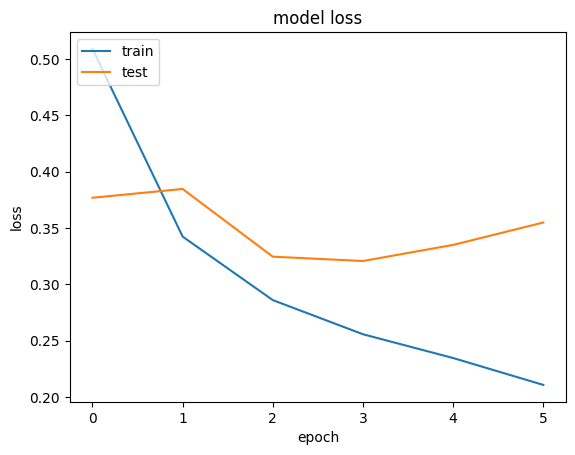

In [ ]:
evaluate(X_test, y_test,model_lstm)
plot(history_lstm)

# Comparaison


### Simple Neural Network Model :
The simple neural network (NN) model, composed of an embedding layer followed by a flatten layer and a dense layer, might find it challenging to grasp intricate patterns within the data due to its straightforward structure.

Test Score: 0.5339395999908447
Test Accuracy: 0.7419000267982483
### CNN Model :
The convolutional neural network (CNN) model, integrating convolutional and pooling layers along with an embedding layer, exhibited enhanced performance compared to the simple NN. CNNs excel at capturing spatial relationships in data, making them particularly suitable for tasks such as image and text classification.

Test Score: 0.7976731061935425
Test Accuracy: 0.5047290325164795
### LSTM Model:
The long short-term memory (LSTM) model, harnessing the sequential nature of text data, surpassed both the simple NN and CNN models in terms of accuracy and loss. LSTMs excel at capturing long-range dependencies within sequential data, rendering them ideal for tasks involving text and time series analysis.

Test Score: 0.34008949995040894
Test Accuracy: 0.8711000084877014

The LSTM model demonstrated superior performance compared to the simple NN and CNN models in classifying the sentiment of movie reviews. Its proficiency in capturing sequential dependencies and long-range patterns contributed to its higher accuracy and lower loss.

<table>
  <tr>
    <th>Simple Neural Network</th>
    <th>CNN</th>
    <th>LSTM</th>
  </tr>
  <tr>
    <td>0.7419000267982483</td>
    <td>0.5047290325164795</td>
    <td>0.8711000084877014</td>
    <td></td>
  </tr>
  
</table>


# Compte Rendu

# Classification with a recurrent neural network (GRU)

In [ ]:
def GRUModel(embedding_matrix,dim=100,vocab_size= vocab_size):
  # Création du modèle séquentiel
  model = Sequential()

  # Ajout de la couche Embedding
  model.add(Embedding(vocab_size, dim, weights=[embedding_matrix], input_length=maxlen))

  # Ajout de la couche GRU
  model.add(GRU(units=128))

  # Ajout de la couche Dense
  model.add(Dense(units=1, activation='sigmoid'))

  # Compilation du modèle
  model.compile(loss=binary_crossentropy, optimizer=Adam(), metrics=['acc'])
  return model


# Classification with a RNN + CNN

In [ ]:
def RnnCnnModel(embedding_matrix,dim=100,vocab_size= vocab_size):
  model_rnn_cnn = Sequential()

  # Ajout de la couche d'embedding
  model_rnn_cnn.add(Embedding(vocab_size, dim, weights=[embedding_matrix], input_length=maxlen))

  # Ajout de la couche Conv1D
  model_rnn_cnn.add(Conv1D(filters=128, kernel_size=5, activation='relu'))

  # Ajout de la couche de pooling MaxPooling1D
  model_rnn_cnn.add(MaxPooling1D())

  # Ajout de la couche LSTM
  model_rnn_cnn.add(LSTM(units=128))

  # Ajout de la couche Dense
  model_rnn_cnn.add(Dense(units=1, activation='sigmoid'))

  # Compilation du modèle
  model_rnn_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
  return model_rnn_cnn


## Test with glove

### Test GRU with glove

Epoch 1/6
250/250 [==============================] - 200s 745ms/step - loss: 0.4898 - acc: 0.7470 - val_loss: 0.3457 - val_acc: 0.8487
Epoch 2/6
250/250 [==============================] - 175s 700ms/step - loss: 0.3061 - acc: 0.8708 - val_loss: 0.3036 - val_acc: 0.8694
Epoch 3/6
250/250 [==============================] - 178s 710ms/step - loss: 0.2561 - acc: 0.8953 - val_loss: 0.3008 - val_acc: 0.8717
Epoch 4/6
250/250 [==============================] - 184s 735ms/step - loss: 0.2220 - acc: 0.9126 - val_loss: 0.3315 - val_acc: 0.8664
Epoch 5/6
250/250 [==============================] - 179s 717ms/step - loss: 0.1895 - acc: 0.9282 - val_loss: 0.3225 - val_acc: 0.8661
Epoch 6/6
313/313 [==============================] - 9s 27ms/step - loss: 0.3457 - acc: 0.8643
Test Score: 0.34574437141418457
Test Accuracy: 0.864300012588501


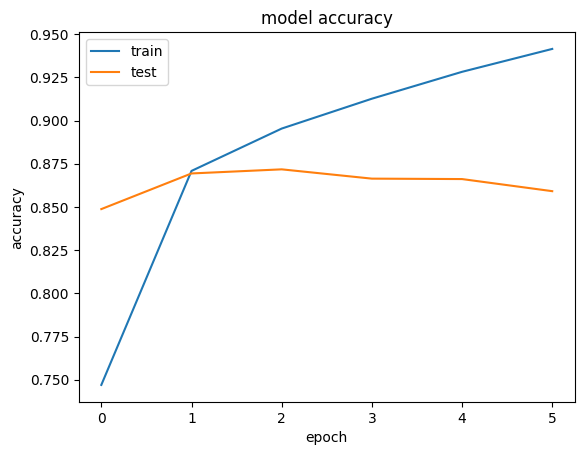

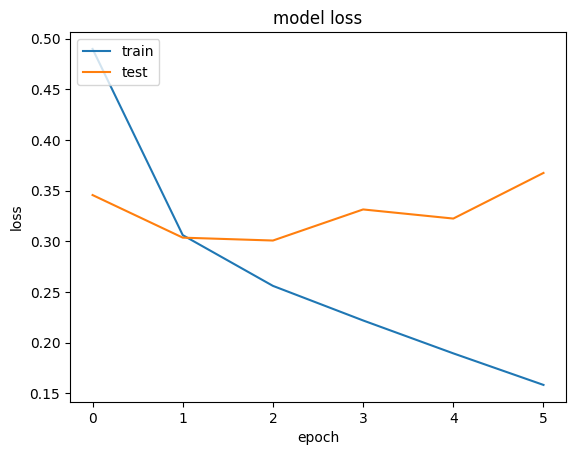

In [ ]:
model_GRU = GRUModel(embedding_matrix_glove)
# Entraînement du modèle
history_GRU = model_GRU.fit(X_train, y_train, epochs=6, batch_size=128, verbose=1, validation_split=0.2)

evaluate(X_test, y_test,model_GRU)
plot(history_GRU)

### Test RNN+CNN with glove

Epoch 1/6
250/250 [==============================] - 196s 762ms/step - loss: 0.4963 - acc: 0.7503 - val_loss: 0.3452 - val_acc: 0.8479
Epoch 2/6
250/250 [==============================] - 161s 645ms/step - loss: 0.3258 - acc: 0.8623 - val_loss: 0.3294 - val_acc: 0.8655
Epoch 3/6
250/250 [==============================] - 166s 662ms/step - loss: 0.2679 - acc: 0.8907 - val_loss: 0.3425 - val_acc: 0.8637
Epoch 4/6
250/250 [==============================] - 133s 532ms/step - loss: 0.2247 - acc: 0.9119 - val_loss: 0.3264 - val_acc: 0.8671
Epoch 5/6
250/250 [==============================] - 130s 521ms/step - loss: 0.1773 - acc: 0.9325 - val_loss: 0.3453 - val_acc: 0.8615
Epoch 6/6
313/313 [==============================] - 13s 39ms/step - loss: 0.4214 - acc: 0.8611
Test Score: 0.4214400351047516
Test Accuracy: 0.861122190952301


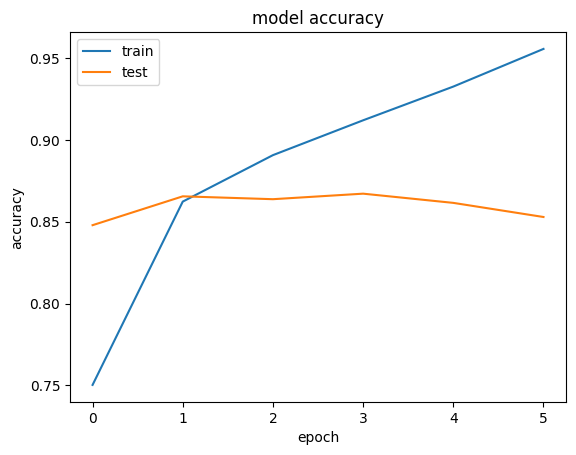

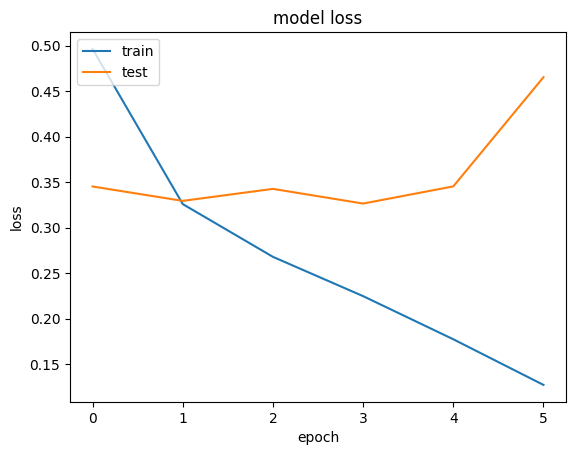

In [ ]:
model_rnn_cnn = RnnCnnModel(embedding_matrix_glove)
# Entraînement du modèle
history_rnn_cnn = model_rnn_cnn.fit(X_train, y_train, epochs=6, batch_size=128, verbose=1, validation_split=0.2)

evaluate(X_test, y_test,model_rnn_cnn)
plot(history_rnn_cnn)


## Test with Word2Vec

In [ ]:
# pip install gensim

In [ ]:
import numpy as np
from gensim.models import Word2Vec

# Convert X_train and X_test to lists of lists
X_train_list = X_train.tolist()
X_test_list = X_test.tolist()

# Concatenate X_train and X_test arrays
sentences_combined = X_train_list + X_test_list

# Train Word2Vec model
word2vec_model = Word2Vec(sentences_combined, vector_size=100, window=5, min_count=1, workers=4)

# Create embedding matrix
# Create embedding matrix
embedding_matrix_Word2Vec = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix_Word2Vec[i] = word2vec_model.wv[word]



In [ ]:
model_LSTM = LSTMModel(embedding_matrix_Word2Vec)
# Entraînement du modèle
history_LSTM = model_LSTM.fit(X_train, y_train, epochs=6, batch_size=128, verbose=1, validation_split=0.2)


evaluate(X_test, y_test,model_LSTM )
plot(history_LSTM)

Epoch 1/6
250/250 [==============================] - 140s 553ms/step - loss: 0.4399 - acc: 0.7823 - val_loss: 0.3745 - val_acc: 0.8399
Epoch 2/6
250/250 [==============================] - 143s 573ms/step - loss: 0.3014 - acc: 0.8755 - val_loss: 0.3390 - val_acc: 0.8526
Epoch 3/6
250/250 [==============================] - 141s 566ms/step - loss: 0.2669 - acc: 0.8924 - val_loss: 0.3421 - val_acc: 0.8530
Epoch 4/6
250/250 [==============================] - 136s 544ms/step - loss: 0.2291 - acc: 0.9105 - val_loss: 0.3623 - val_acc: 0.8620
Epoch 5/6
250/250 [==============================] - 141s 565ms/step - loss: 0.1920 - acc: 0.9290 - val_loss: 0.3792 - val_acc: 0.8550
Epoch 6/6
313/313 [==============================] - 10s 32ms/step - loss: 0.3731 - acc: 0.8470
Test Score: 0.3730916976928711
Test Accuracy: 0.847000002861023


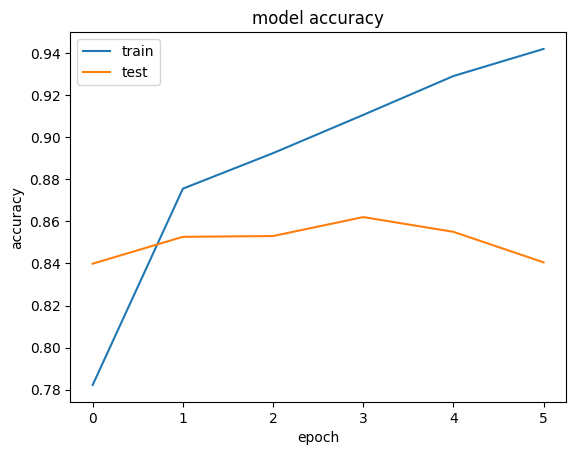

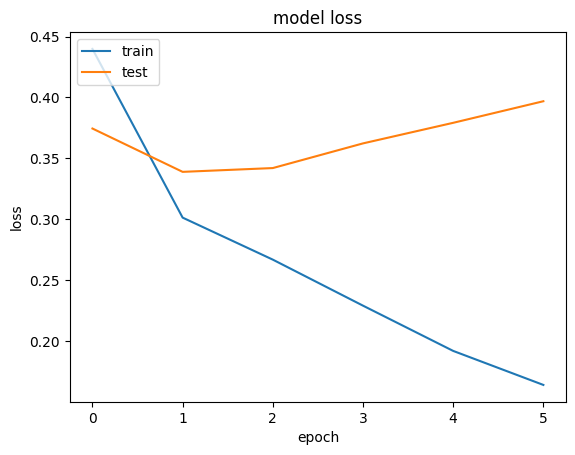

In [ ]:
model_GRU = GRUModel(embedding_matrix_Word2Vec)
# Entraînement du modèle
history_GRU = model_GRU.fit(X_train, y_train, epochs=6, batch_size=128, verbose=1, validation_split=0.2)


evaluate(X_test, y_test,model_GRU )
plot(history_GRU)

Epoch 1/6
250/250 [==============================] - 170s 661ms/step - loss: 0.6932 - acc: 0.4977 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 2/6
250/250 [==============================] - 180s 721ms/step - loss: 0.6932 - acc: 0.4993 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 3/6
250/250 [==============================] - 165s 662ms/step - loss: 0.6932 - acc: 0.4995 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 4/6
250/250 [==============================] - 164s 659ms/step - loss: 0.6932 - acc: 0.4986 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 5/6
250/250 [==============================] - 169s 678ms/step - loss: 0.6932 - acc: 0.4993 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 6/6
313/313 [==============================] - 13s 42ms/step - loss: 0.6932 - acc: 0.4961
Test Score: 0.6932252645492554
Test Accuracy: 0.4961000084877014


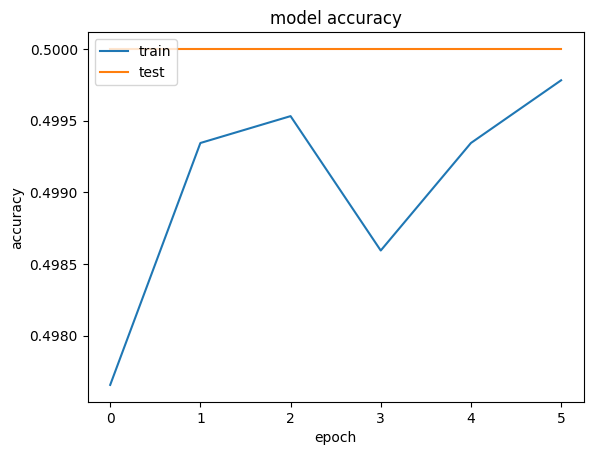

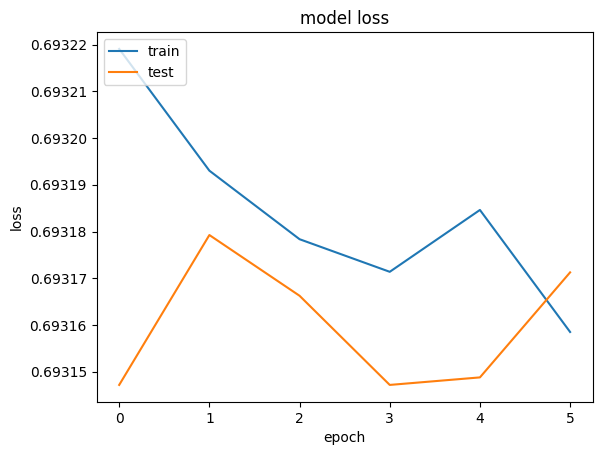

In [ ]:
model_rnn_cnn = RnnCnnModel(embedding_matrix_Word2Vec)
# Entraînement du modèle
history_rnn_cnn = model_rnn_cnn.fit(X_train, y_train, epochs=6, batch_size=128, verbose=1, validation_split=0.2)

evaluate(X_test, y_test,model_rnn_cnn)
plot(history_rnn_cnn)


# FastText

In [ ]:
from gensim.models import FastText

# Convert X_train and X_test to lists of lists
X_train_list = X_train.tolist()
X_test_list = X_test.tolist()

# Concatenate X_train and X_test arrays
sentences_combined = X_train_list + X_test_list
# Train FastText model
fasttext_model = FastText(sentences_combined, vector_size=100, window=5, min_count=1, workers=4)

# Create embedding matrix
embedding_matrix_fasttext = np.zeros((vocab_size, fasttext_model.vector_size))
for word, i in tokenizer.word_index.items():
    if word in fasttext_model.wv:
        embedding_matrix_fasttext[i] = fasttext_model.wv[word]


Epoch 1/6
250/250 [==============================] - 151s 595ms/step - loss: 0.4379 - acc: 0.7915 - val_loss: 0.3464 - val_acc: 0.8511
Epoch 2/6
250/250 [==============================] - 150s 600ms/step - loss: 0.3016 - acc: 0.8770 - val_loss: 0.3507 - val_acc: 0.8526
Epoch 3/6
250/250 [==============================] - 152s 610ms/step - loss: 0.2691 - acc: 0.8930 - val_loss: 0.3427 - val_acc: 0.8486
Epoch 4/6
250/250 [==============================] - 150s 598ms/step - loss: 0.2315 - acc: 0.9089 - val_loss: 0.3609 - val_acc: 0.8503
Epoch 5/6
250/250 [==============================] - 151s 604ms/step - loss: 0.2036 - acc: 0.9201 - val_loss: 0.3851 - val_acc: 0.8380
Epoch 6/6
313/313 [==============================] - 17s 55ms/step - loss: 0.4611 - acc: 0.8389
Test Score: 0.461119681596756
Test Accuracy: 0.8389000296592712


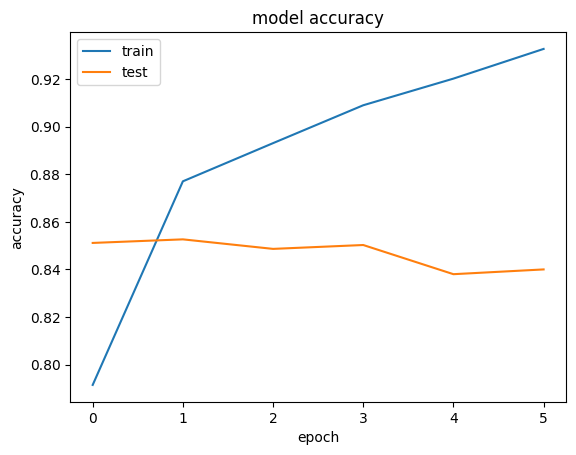

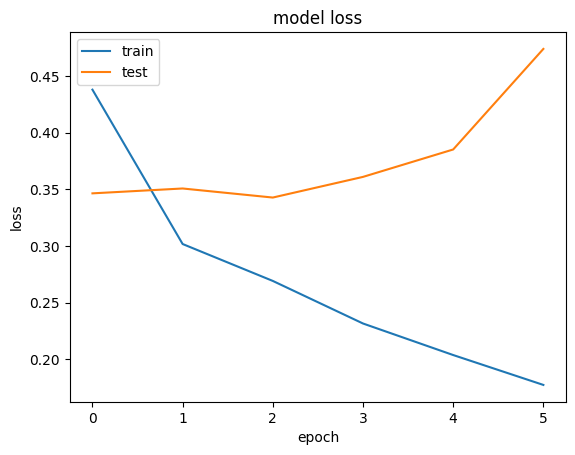

In [ ]:
# Entraînement du modèle
model_LSTM = LSTMModel(embedding_matrix_fasttext)
history_LSTM = model_LSTM .fit(X_train, y_train, epochs=6, batch_size=128, verbose=1, validation_split=0.2)

evaluate(X_test, y_test,model_LSTM  )
plot(history_LSTM)

Epoch 1/6
250/250 [==============================] - 144s 567ms/step - loss: 0.4296 - acc: 0.7893 - val_loss: 0.3373 - val_acc: 0.8554
Epoch 2/6
250/250 [==============================] - 135s 542ms/step - loss: 0.2954 - acc: 0.8783 - val_loss: 0.3389 - val_acc: 0.8554
Epoch 3/6
250/250 [==============================] - 141s 563ms/step - loss: 0.2573 - acc: 0.8964 - val_loss: 0.3341 - val_acc: 0.8561
Epoch 4/6
250/250 [==============================] - 139s 555ms/step - loss: 0.2112 - acc: 0.9186 - val_loss: 0.3648 - val_acc: 0.8599
Epoch 5/6
250/250 [==============================] - 145s 579ms/step - loss: 0.1734 - acc: 0.9350 - val_loss: 0.4012 - val_acc: 0.8533
Epoch 6/6
313/313 [==============================] - 10s 31ms/step - loss: 0.3927 - acc: 0.8526
Test Score: 0.39269983768463135
Test Accuracy: 0.8525999784469604


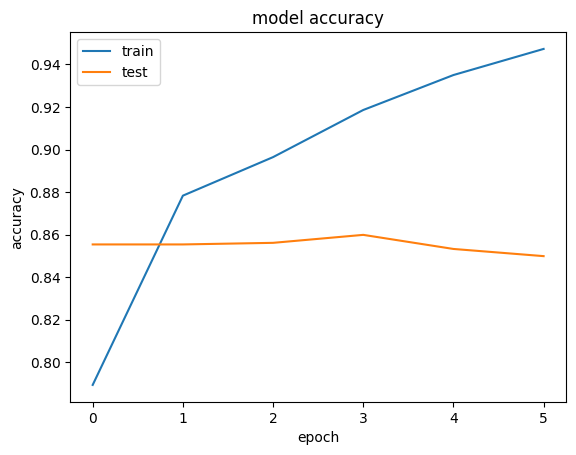

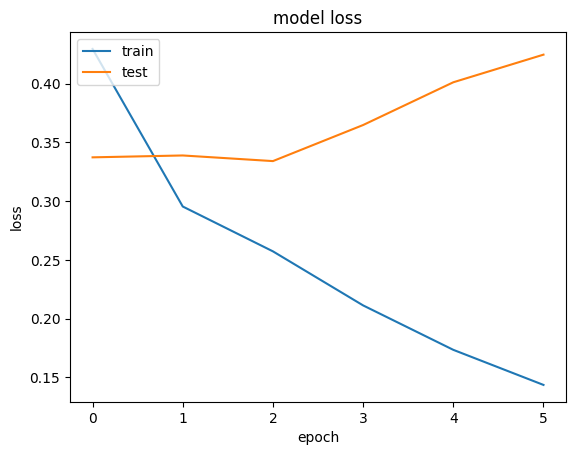

In [ ]:
# Entraînement du modèle
model_GRU = GRUModel(embedding_matrix_fasttext)
history_GRU= model_GRU .fit(X_train, y_train, epochs=6, batch_size=128, verbose=1, validation_split=0.2)

evaluate(X_test, y_test,model_GRU  )
plot(history_GRU)

Epoch 1/6
250/250 [==============================] - 137s 541ms/step - loss: 0.4065 - acc: 0.8058 - val_loss: 0.3264 - val_acc: 0.8576
Epoch 2/6
250/250 [==============================] - 135s 539ms/step - loss: 0.2751 - acc: 0.8878 - val_loss: 0.3416 - val_acc: 0.8621
Epoch 3/6
250/250 [==============================] - 139s 556ms/step - loss: 0.2244 - acc: 0.9112 - val_loss: 0.3479 - val_acc: 0.8591
Epoch 4/6
250/250 [==============================] - 136s 542ms/step - loss: 0.1690 - acc: 0.9383 - val_loss: 0.3710 - val_acc: 0.8506
Epoch 5/6
250/250 [==============================] - 137s 548ms/step - loss: 0.1146 - acc: 0.9608 - val_loss: 0.4503 - val_acc: 0.8447
Epoch 6/6
313/313 [==============================] - 12s 40ms/step - loss: 0.4759 - acc: 0.8509
Test Score: 0.475894957780838
Test Accuracy: 0.8508999943733215


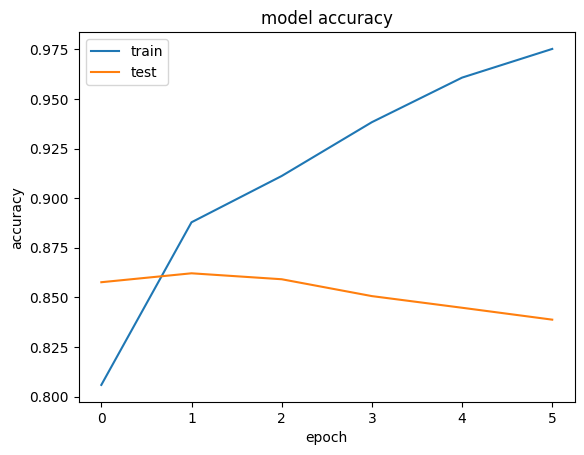

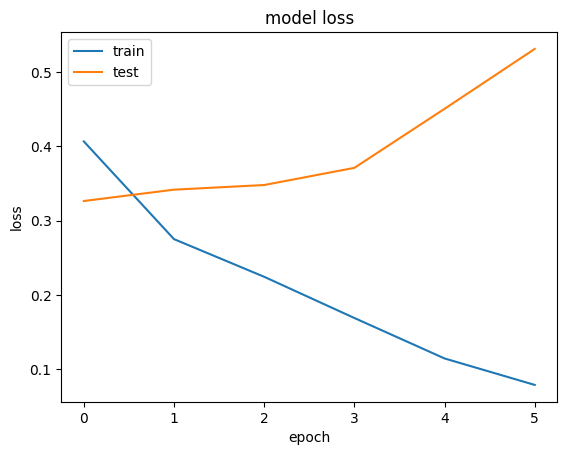

In [ ]:
model_rnn_cnn = RnnCnnModel(embedding_matrix_fasttext)
# Entraînement du modèle
history_rnn_cnn = model_rnn_cnn.fit(X_train, y_train, epochs=6, batch_size=128, verbose=1, validation_split=0.2)

evaluate(X_test, y_test,model_rnn_cnn)
plot(history_rnn_cnn)


# Tf-idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

from gensim.models import Word2Vec

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=42)
# Concatenate X_train and X_test arrays
X_combined = X_train + X_test

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=100)
tfidf_matrix = vectorizer.fit_transform(X_combined)




In [ ]:
from sklearn.preprocessing import normalize
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=42)
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=100)  # Adjust max_features as needed

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Normalize TF-IDF vectors
X_train_tfidf_normalized = normalize(X_train_tfidf, norm='l2')
X_test_tfidf_normalized = normalize(X_test_tfidf, norm='l2')

# Convert TF-IDF vectors into sequences
X_train_seq = []
X_test_seq = []
maxlen = 100  # Max sequence length

# Convert training data
for tfidf_vector in X_train_tfidf_normalized:
    sequence = tfidf_vector.indices.tolist()[:maxlen]  # Consider only the indices with highest TF-IDF values
    X_train_seq.append(sequence)

# Convert test data
for tfidf_vector in X_test_tfidf_normalized:
    sequence = tfidf_vector.indices.tolist()[:maxlen]  # Consider only the indices with highest TF-IDF values
    X_test_seq.append(sequence)

# Pad sequences
X_train_pad = pad_sequences(X_train_seq, padding='post', maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, padding='post', maxlen=maxlen)


# Get the embedding matrix
embedding_matrix = np.zeros((len(tfidf_vectorizer.vocabulary_) + 1, X_train_tfidf_normalized.shape[1]))  # +1 for unknown words
for word, i in tfidf_vectorizer.vocabulary_.items():
    embedding_matrix[i] = X_train_tfidf_normalized[i].toarray().flatten()


In [ ]:
# Get the embedding dimension
embedding_dim = X_train_tfidf_normalized.shape[1]


vocab_size = len(tfidf_vectorizer.vocabulary_) + 1  # Vocabulary size
model_LSTM = LSTMModel(embedding_matrix,embedding_dim, vocab_size)
# Entraînement du modèle
history_LSTM = model_LSTM.fit(X_train_pad, y_train, epochs=6, batch_size=128, verbose=1, validation_split=0.2)




Epoch 1/6
250/250 [==============================] - 194s 615ms/step - loss: 0.6938 - acc: 0.5037 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 2/6
250/250 [==============================] - 101s 405ms/step - loss: 0.6934 - acc: 0.4999 - val_loss: 0.6936 - val_acc: 0.5000
Epoch 3/6
250/250 [==============================] - 103s 411ms/step - loss: 0.6936 - acc: 0.4998 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 4/6
250/250 [==============================] - 100s 400ms/step - loss: 0.6932 - acc: 0.5033 - val_loss: 0.6931 - val_acc: 0.5064
Epoch 5/6
250/250 [==============================] - 103s 414ms/step - loss: 0.6934 - acc: 0.5011 - val_loss: 0.6907 - val_acc: 0.5685
Epoch 6/6
250/250 [==============================] - 100s 402ms/step - loss: 0.6464 - acc: 0.6192 - val_loss: 0.6149 - val_acc: 0.6720


313/313 [==============================] - 22s 69ms/step - loss: 0.6555 - acc: 0.6259
Test Score: 0.6554883718490601
Test Accuracy: 0.6258999705314636


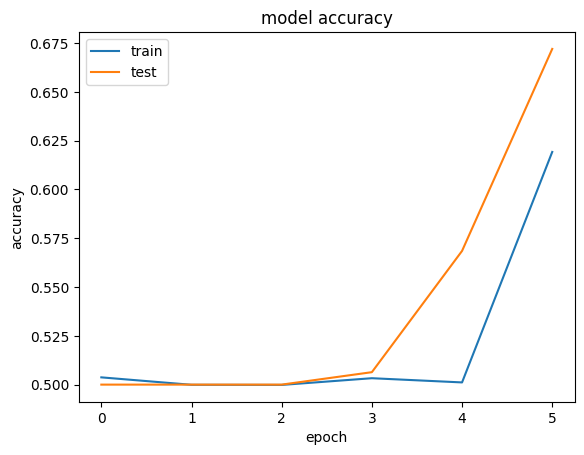

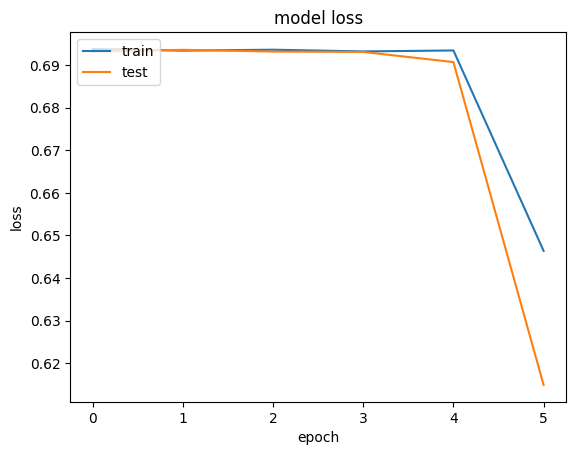

In [ ]:
evaluate(X_test_pad, y_test,model_LSTM )
plot(history_LSTM)

In [ ]:
# Entraînement du modèle
model_GRU = GRUModel(embedding_matrix,embedding_dim, vocab_size)
history_GRU= model_GRU .fit(X_train_pad, y_train, epochs=20, batch_size=128, verbose=1, validation_split=0.2)



Epoch 1/20
250/250 [==============================] - 97s 372ms/step - loss: 0.6939 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 2/20
250/250 [==============================] - 85s 339ms/step - loss: 0.6934 - acc: 0.4992 - val_loss: 0.6934 - val_acc: 0.5000
Epoch 3/20
250/250 [==============================] - 84s 335ms/step - loss: 0.6934 - acc: 0.4982 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 4/20
250/250 [==============================] - 79s 315ms/step - loss: 0.6932 - acc: 0.5051 - val_loss: 0.6934 - val_acc: 0.5000
Epoch 5/20
250/250 [==============================] - 84s 336ms/step - loss: 0.6933 - acc: 0.4947 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 6/20
250/250 [==============================] - 84s 337ms/step - loss: 0.6931 - acc: 0.5048 - val_loss: 0.6935 - val_acc: 0.5000
Epoch 7/20
250/250 [==============================] - 84s 337ms/step - loss: 0.6933 - acc: 0.4983 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 8/20
250/250 [==============================] - 8

313/313 [==============================] - 11s 34ms/step - loss: 0.6931 - acc: 0.5039
Test Score: 0.6931426525115967
Test Accuracy: 0.5038999915122986


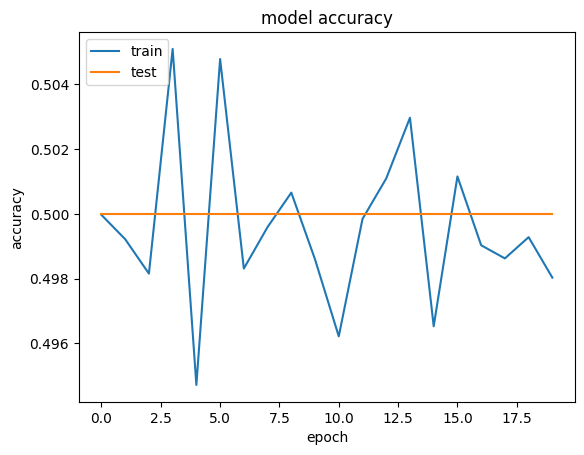

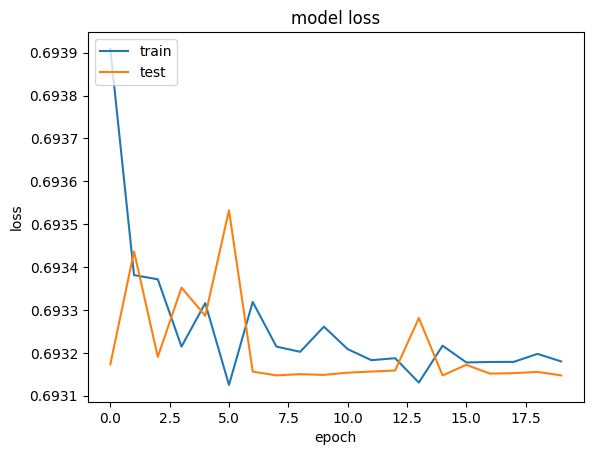

In [ ]:
evaluate(X_test_pad, y_test,model_GRU  )
plot(history_GRU)

In [ ]:
model_rnn_cnn = RnnCnnModel(embedding_matrix,embedding_dim, vocab_size)
# Entraînement du modèle
history_rnn_cnn = model_rnn_cnn.fit(X_train_pad, y_train, epochs=6, batch_size=128, verbose=1, validation_split=0.2)



Epoch 1/6
250/250 [==============================] - 97s 374ms/step - loss: 0.6660 - acc: 0.5713 - val_loss: 0.6291 - val_acc: 0.6766
Epoch 2/6
250/250 [==============================] - 89s 356ms/step - loss: 0.5919 - acc: 0.6939 - val_loss: 0.5722 - val_acc: 0.7059
Epoch 3/6
250/250 [==============================] - 88s 353ms/step - loss: 0.5740 - acc: 0.7047 - val_loss: 0.5898 - val_acc: 0.6854
Epoch 4/6
250/250 [==============================] - 93s 374ms/step - loss: 0.5675 - acc: 0.7089 - val_loss: 0.5703 - val_acc: 0.7067
Epoch 5/6
250/250 [==============================] - 90s 361ms/step - loss: 0.5647 - acc: 0.7074 - val_loss: 0.5693 - val_acc: 0.7092
Epoch 6/6
250/250 [==============================] - 87s 348ms/step - loss: 0.5609 - acc: 0.7113 - val_loss: 0.5683 - val_acc: 0.7074


313/313 [==============================] - 13s 42ms/step - loss: 0.5782 - acc: 0.6939
Test Score: 0.5781663060188293
Test Accuracy: 0.6938999891281128


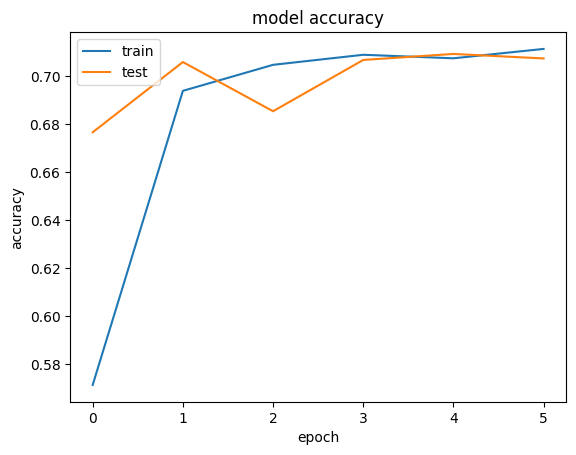

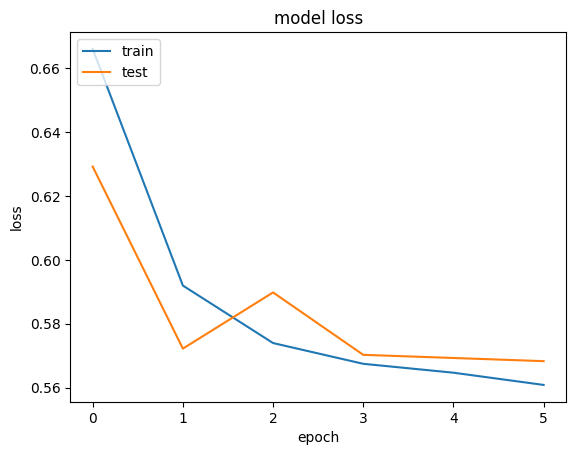

In [ ]:

evaluate(X_test_pad, y_test,model_rnn_cnn)
plot(history_rnn_cnn)

# Conclusion :

### Test accuracy

<table>
  <tr>
    <th></th>
    <th>Glove</th>
    <th>Wor2vec</th>
    <th>Fasttext</th>
    <th>Tf-idf</th>
  </tr>
  <tr>
    <td>LSTM</td>
    <td>0.8711000084877014</td>
    <td>0.8442999720573425</td>
    <td>0.8389000296592712</td>
    <td>0.6258999705314636</td>
  </tr>
  <tr>
    <td>GRU</td>
    <td>0.864300012588501</td>
    <td>0.847000002861023</td>
    <td>0.8525999784469604</td>
    <td>0.5038999915122986</td>
  </tr>
    <tr>
    <td>RNN+CNN</td>
    <td>0.861122190952301</td>
    <td>0.4961000084877014</td>
    <td>0.8508999943733215</td>
    <td>0.6938999891281128</td>
  </tr>
</table>
